# Machine Learning in Python (scipy)



## SciPy


First we need to import `scipy`:

In [1]:
import scipy

The `scipy` package provides information about its own structure when we use the help command:

```python
help(scipy)
```

The output is very long, so we're showing just a part of it here:

     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     linalg.lapack                --- Wrappers to LAPACK library
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     signal.windows               --- Window functions
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)
     spatial                      --- Spatial data structures and algorithms
     special                      --- Special functions
     stats                        --- Statistical Functions
     
     

If we are looking for an algorithm to integrate a function, we might explore the `integrate` package:

```python
import scipy.integrate
```
```text
scipy.integrate?
```

produces:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Solving initial value problems for ODE systems
==============================================

The solvers are implemented as individual classes which can be used directly
(low-level usage) or through a convenience function.

.. autosummary::
   :toctree: generated/

   solve_ivp     -- Convenient function for ODE integration.
   RK23          -- Explicit Runge-Kutta solver of order 3(2).
   RK45          -- Explicit Runge-Kutta solver of order 5(4).
   DOP853        -- Explicit Runge-Kutta solver of order 8.
   Radau         -- Implicit Runge-Kutta solver of order 5.
   BDF           -- Implicit multi-step variable order (1 to 5) solver.
   LSODA         -- LSODA solver from ODEPACK Fortran package.
   OdeSolver     -- Base class for ODE solvers.
   DenseOutput   -- Local interpolant for computing a dense output.
   OdeSolution   -- Class which represents a continuous ODE solution.
```

The following sections show examples which demonstrate how to employ the algorithms provided by `scipy`.

# Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

- Airy functions
- Elliptic functions and integrals
- Bessel functions
- Gamma functions
- etc....

In [2]:
#some code to help display things in this notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# plot style so figures are more readable. Hopefully
plt.rcParams['figure.figsize'] = (11, 7.5)
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 14

## Polynomials

The module contains a large number of functions for evaluating polynomials and calculating their roots.

The following plot shows just a few of them.


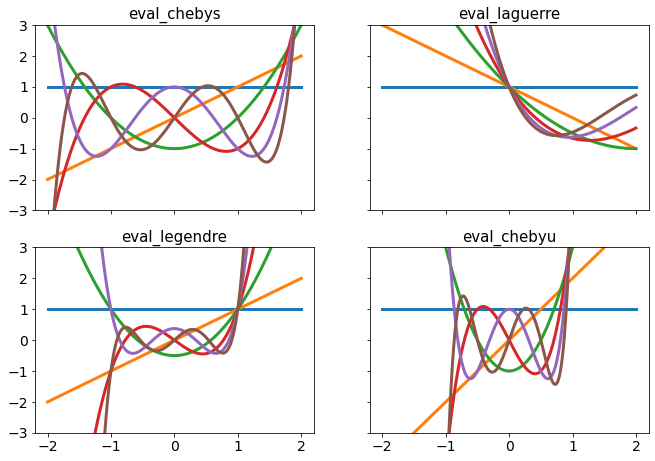

In [4]:
from scipy import special

functions = [special.eval_chebys, special.eval_laguerre, special.eval_legendre, special.eval_chebyu]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True )

x = np.linspace(-2., 2., 200)

for ax, f in zip(np.ravel(axs), functions):
    ax.set_title(f.__name__)
    for n in range(6):
        ax.plot(x, f(n, x))
    ax.set_ylim([-3, 3])

## Statistical Functions

The module also contains a host of useful functions for statistical computations. for example the so called 'error function' `scipy.special.erf`

\begin{align}
\operatorname {erf}(x)&={\frac {1}{\sqrt {\pi }}}\int _{-x}^{x}e^{-t^{2}},dt \\ &={\frac {2}{\sqrt {\pi }}}\int _{0}^{x}e^{-t^{2}}\,dt.
\end{align}

Which allows you to get the gaussian probability dsitribution
$$
\phi(z) = \frac 1 2 \left(1 + erf\left(\frac{z}{sqrt(2)}\right) \right)
$$

The module `scipy.stats` contains nicer methods to handle statistical methods. More on that later.

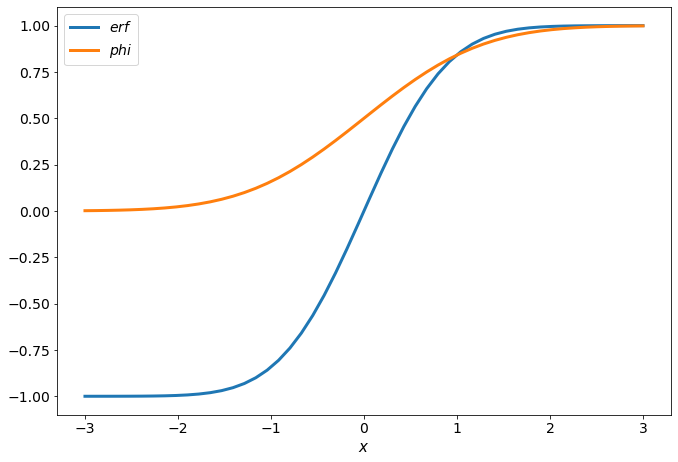

In [5]:
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x), label='$erf$')
plt.plot(x, 0.5 * (1 + special.erf(x/np.sqrt(2))), label='$phi$')
plt.xlabel('$x$')
plt.legend()

## Bessel Functions
To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions.
The `scipy.special` module includes a large number of Bessel-functions
Here we will use the functions $j_n$ and $y_n$, which are the Bessel functions 
of the first and second kind and real-valued order.

Bessel functions are a family of solutions to Bessel’s differential equation with real or complex order alpha:
$$
x^2 \frac{d^2 y}{dx^2} +x  \frac{dy}{dx} +(x^2−α^2)y=0
$$

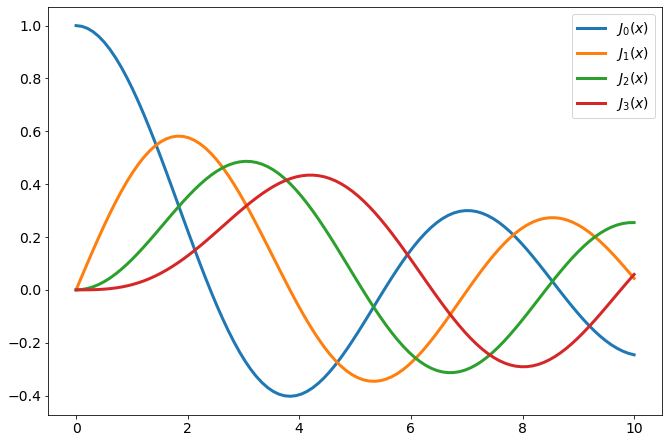

In [6]:
from scipy import special
x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, special.jn(n, x), label=f'$J_{n}(x)$')
plt.legend();

Among other uses, these functions arise in wave propagation problems such as the vibrational modes of a thin drum head. Here is an example of a circular drum head anchored at the edge.

https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane

In [7]:
# fix the radius of the drum
DRUM_RADIUS = 1

def drumhead_height(n, k, distance, angle, t):
    '''
    Solution to the Drumhead problem with a fixed membrane on the edge of the drum
    See https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
    '''
    kth_zero = special.jn_zeros(n, k)[-1] # fix the drum on the outter edge to be zero.
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero/DRUM_RADIUS)


# create two lists containing all combinations of radius and theta we want to plot
r = np.linspace(0, DRUM_RADIUS, 50)
t = np.linspace(0, 2*np.pi, 50)
radius, theta = np.meshgrid(r, t) # this creates all combinations we are interested in

x = radius * np.cos(theta)
y = radius * np.sin(theta)
z = drumhead_height(1, 1, radius, theta, 0.5)

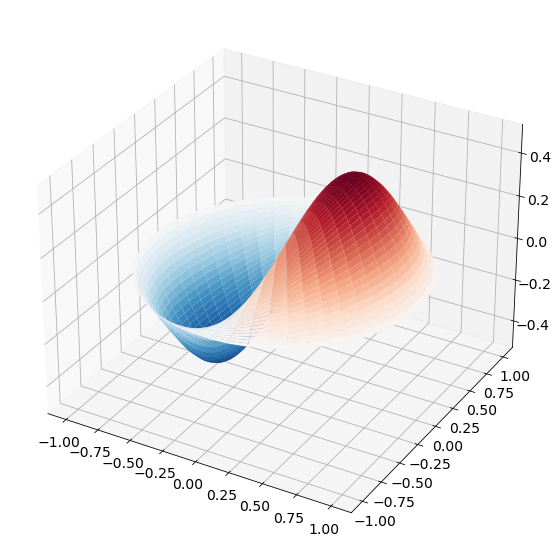

In [8]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(x, y, z, cmap='RdBu_r')

  0%|          | 0/200 [00:00<?, ?it/s]

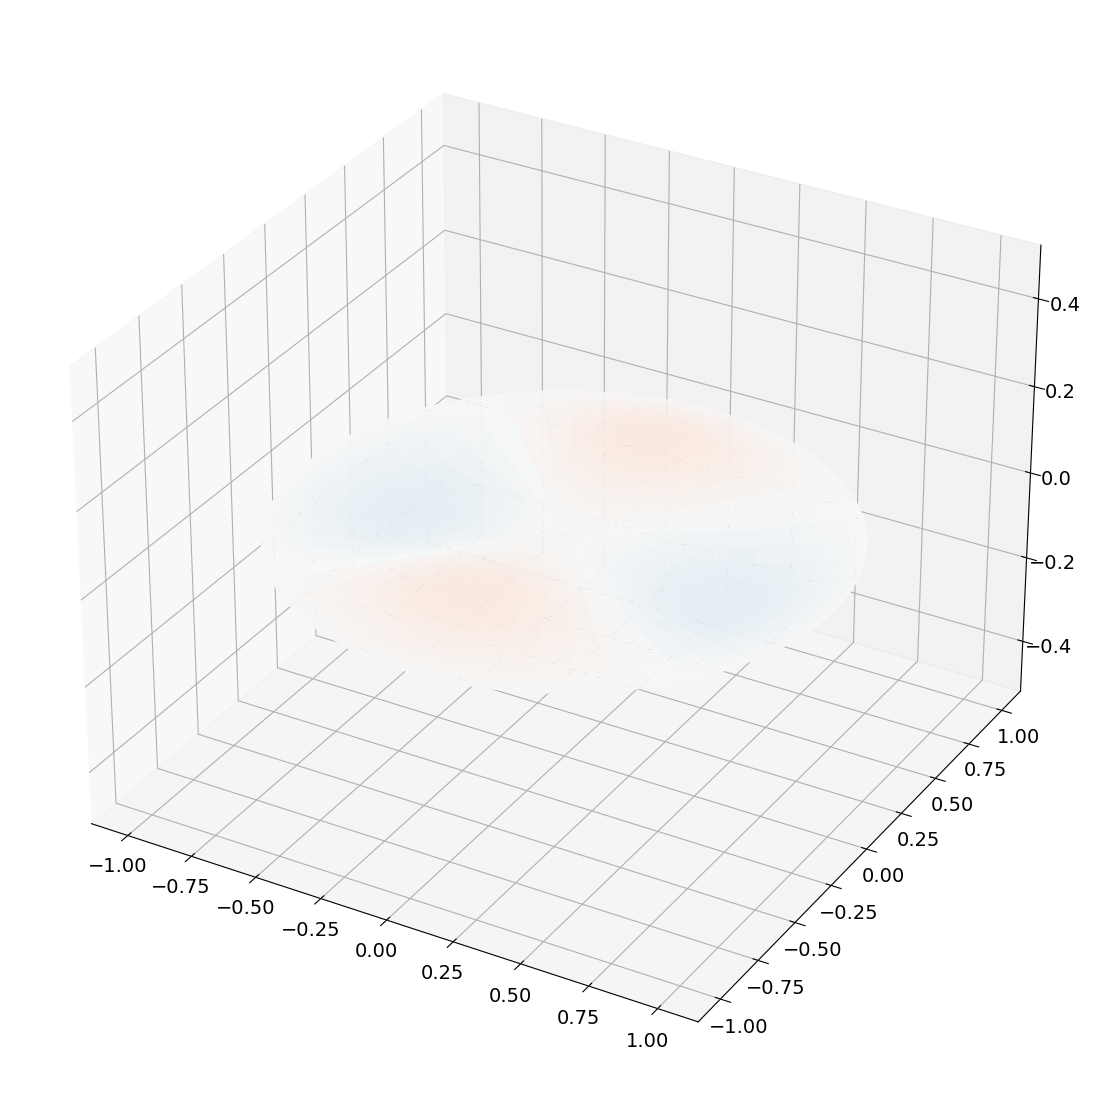

In [12]:
# some code to create a nice animation within the notebook.
from matplotlib.animation import FuncAnimation
from functools import partial
from tqdm.notebook import tqdm


my_drum = partial(drumhead_height, n=2, k=1, distance=radius, angle=theta)

frames = 200
fps = 25

fig = plt.figure(figsize=(19.2, 10.8), dpi=100)  # FullHD
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(x, y, my_drum(t=0), cmap='YlGnBu')

bar = tqdm(total=frames)

def init():
    pass


def update(i):
    bar.update()
   
    t = i / fps
    ax.cla()
    z = my_drum(t=t)
    ax.plot_surface(x, y, z, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
    ax.set_zlim(-0.5, 0.5)
    
    
ani = FuncAnimation(fig, update, init_func=init, frames=frames, interval=1000 / fps, blit=False, repeat=False)
ani.save('animation_membrane.mp4', writer="ffmpeg")

In [ ]:
from IPython.display import Video
Video('./animation_membrane.mp4', width=800)


## Numerical integration

Scientific Python provides a number of integration routines. A general purpose tool to solve integrals *I* of the kind

$$I=\int_a^b f(x) \mathrm{d} x$$

is provided by the `quad()` function of the `scipy.integrate` module.

It takes as input arguments the function *f*(*x*) to be integrated (the “integrand”), and the lower and upper limits *a* and *b*. It returns two values (in a tuple): the first one is the computed results and the second one is an estimation of the numerical error of that result.

Here is an example: which produces this output:

In [ ]:
# NBVAL_IGNORE_OUTPUT
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

Note that `quad()` takes optional parameters `epsabs` and `epsrel` to increase or decrease the accuracy of its computation. (Use `help(quad)` to learn more.) The default values are `epsabs=1.5e-8` and `epsrel=1.5e-8`. For the next exercise, the default values are sufficient.


## Solving Ordinary Differential Equations (ODEs)

To solve an ordinary differential equation of the type
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(t, y)$$

with a given $y(t_0)=y_0$, we can use `scipy`’s `solve_ivp` function. Here is a (self explaining) example program (`usesolve_ivp.py`) to find 

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
 given this differential equation:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

def f(t, y):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = [1]           # initial value y0=y(t0)
t0 = 0             # integration limits for t: start at t0=0
tf = 2             # and finish at tf=2

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0)  # computation of SOLution 

import pylab          # plotting of results
pylab.plot(sol.t, sol.y[0], 'o-')
pylab.xlabel('t'); pylab.ylabel('y(t)')

We have not given the `solve_ivp` command any guidance for which values of $t$ we would like to know the solution $y(t)$: we have only specified that $t_0 = 0$ and that we would like to know the solution between $t_0=0$ and $t_y=2$. The solver itself has determined the number of required function evaluations, and returns the corresponding values in `sol.t` and `sol.y[0]`.

We can obtain more data points in a number of ways:

1. Increase the default error tolerance. The relative tolerance (`rtol`) and absolute tolerance (`atol`) default to `1e-3` each. If we increase them, we typically enforce the use of a larger number of intermediate points:

In [ ]:
sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, atol=1e-8, rtol=1e-8)

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

2. We can also prescribe the precise locations for which we like to know the solutions $y(t)$:

In [ ]:
y0 = [1]           # initial value
t0 = 0             # integration limits for t
tf = 2              
ts = np.linspace(t0, tf, 100)  # 100 points between t0 and tf

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=ts) 

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

If we use `t_eval` - and thus request values of the solution at particular points - `solve_ivp` will not generally change the way it computes the solution, but rather use interpolation to map the way it has internally computed the solution to the values of t for which we would like to know the solution. There is thus no (significant) computational penalty if we use `t_eval` to get smoother looking plots.

The `solve_ivp` command returns a `OdeResult` object, which we have called `sol` in the example above. 

In [ ]:
type(sol)

We have already seen that the solution can be found in `sol.y` and `sol.t`:

In [ ]:
type(sol.t)

In [ ]:
sol.t.shape

In [ ]:
type(sol.y)

In [ ]:
sol.y.shape

Because `solve_ivp` is designed to integrate *systems* of ordinary differential equations, `sol.y` is a matrix, where each row contains the values for one degree of freedom. In our simple example above, we only have one degree of freedom ($y$). This is the reason, why we had to use `sol.y[0]` to access the solution values.

Other interesting attributes of the `OdeResult` object are the number of function evaluations that were necessary (where the function is the function `f` which computes the right hand side of the ODE).

In [ ]:
sol.nfev

There is also a human-readable string, providing - for this example - a re-assuring message:

In [ ]:
sol.message

A machine readable status is available in the `sol.status` attribute (0 is good):

In [ ]:
sol.status

The `solve_ivp` command takes a number of optional parameters - we have already seen `atol` and `rtol` to change the default error tolerance of the integration. We can use the `help` command to explore these. The help string also explains the attributes of the solution object `OdeResult` in more detail:

```python
help(scipy.integrate.solve_ivp)
```

will show:

```
Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a complex data type.
    Another option always available is to rewrite your problem for real and
    imaginary parts separately.
    
    Parameters
    ----------
    fun : callable
        Right-hand side of the system. The calling signature is ``fun(t, y)``.
        Here `t` is a scalar, and there are two options for the ndarray `y`:
        It can either have shape (n,); then `fun` must return array_like with
        shape (n,). Alternatively, it can have shape (n, k); then `fun`
        must return an array_like with shape (n, k), i.e., each column
        corresponds to a single column in `y`. The choice between the two
        options is determined by `vectorized` argument (see below). The
        vectorized implementation allows a faster approximation of the Jacobian
        by finite differences (required for stiff solvers).
    t_span : 2-tuple of floats
        Interval of integration (t0, tf). The solver starts with t=t0 and
        integrates until it reaches t=tf.
    y0 : array_like, shape (n,)
        Initial state. For problems in the complex domain, pass `y0` with a
        complex data type (even if the initial value is purely real).
    method : string or `OdeSolver`, optional
        Integration method to use:
    
            * 'RK45' (default): Explicit Runge-Kutta method of order 5(4) [1]_.
              The error is controlled assuming accuracy of the fourth-order
              method, but steps are taken using the fifth-order accurate
              formula (local extrapolation is done). A quartic interpolation
              polynomial is used for the dense output [2]_. Can be applied in
              the complex domain.
            * 'RK23': Explicit Runge-Kutta method of order 3(2) [3]_. The error
              is controlled assuming accuracy of the second-order method, but
              steps are taken using the third-order accurate formula (local
              extrapolation is done). A cubic Hermite polynomial is used for the
              dense output. Can be applied in the complex domain.
            * 'DOP853': Explicit Runge-Kutta method of order 8 [13]_.
              Python implementation of the "DOP853" algorithm originally
              written in Fortran [14]_. A 7-th order interpolation polynomial
              accurate to 7-th order is used for the dense output.
              Can be applied in the complex domain.
            * 'Radau': Implicit Runge-Kutta method of the Radau IIA family of
              order 5 [4]_. The error is controlled with a third-order accurate
              embedded formula. A cubic polynomial which satisfies the
              collocation conditions is used for the dense output.
            * 'BDF': Implicit multi-step variable-order (1 to 5) method based
              on a backward differentiation formula for the derivative
              approximation [5]_. The implementation follows the one described
              in [6]_. A quasi-constant step scheme is used and accuracy is
              enhanced using the NDF modification. Can be applied in the
              complex domain.
            * 'LSODA': Adams/BDF method with automatic stiffness detection and
              switching [7]_, [8]_. This is a wrapper of the Fortran solver
              from ODEPACK.
    
        Explicit Runge-Kutta methods ('RK23', 'RK45', 'DOP853') should be used
        for non-stiff problems and implicit methods ('Radau', 'BDF') for
        stiff problems [9]_. Among Runge-Kutta methods, 'DOP853' is recommended
        for solving with high precision (low values of `rtol` and `atol`).
    
        If not sure, first try to run 'RK45'. If it makes unusually many
        iterations, diverges, or fails, your problem is likely to be stiff and
        you should use 'Radau' or 'BDF'. 'LSODA' can also be a good universal
        choice, but it might be somewhat less convenient to work with as it
        wraps old Fortran code.
    
        You can also pass an arbitrary class derived from `OdeSolver` which
        implements the solver.
    t_eval : array_like or None, optional
        Times at which to store the computed solution, must be sorted and lie
        within `t_span`. If None (default), use points selected by the solver.
    dense_output : bool, optional
        Whether to compute a continuous solution. Default is False.
    events : callable, or list of callables, optional
        Events to track. If None (default), no events will be tracked.
        Each event occurs at the zeros of a continuous function of time and
        state. Each function must have the signature ``event(t, y)`` and return
        a float. The solver will find an accurate value of `t` at which
        ``event(t, y(t)) = 0`` using a root-finding algorithm. By default, all
        zeros will be found. The solver looks for a sign change over each step,
        so if multiple zero crossings occur within one step, events may be
        missed. Additionally each `event` function might have the following
        attributes:
    
            terminal: bool, optional
                Whether to terminate integration if this event occurs.
                Implicitly False if not assigned.
            direction: float, optional
                Direction of a zero crossing. If `direction` is positive,
                `event` will only trigger when going from negative to positive,
                and vice versa if `direction` is negative. If 0, then either
                direction will trigger event. Implicitly 0 if not assigned.
    
        You can assign attributes like ``event.terminal = True`` to any
        function in Python.
    vectorized : bool, optional
        Whether `fun` is implemented in a vectorized fashion. Default is False.
    args : tuple, optional
        Additional arguments to pass to the user-defined functions.  If given,
        the additional arguments are passed to all user-defined functions.
        So if, for example, `fun` has the signature ``fun(t, y, a, b, c)``,
        then `jac` (if given) and any event functions must have the same
        signature, and `args` must be a tuple of length 3.
    options
        Options passed to a chosen solver. All options available for already
        implemented solvers are listed below.
    first_step : float or None, optional
        Initial step size. Default is `None` which means that the algorithm
        should choose.
    max_step : float, optional
        Maximum allowed step size. Default is np.inf, i.e., the step size is not
        bounded and determined solely by the solver.
    rtol, atol : float or array_like, optional
        Relative and absolute tolerances. The solver keeps the local error
        estimates less than ``atol + rtol * abs(y)``. Here `rtol` controls a
        relative accuracy (number of correct digits). But if a component of `y`
        is approximately below `atol`, the error only needs to fall within
        the same `atol` threshold, and the number of correct digits is not
        guaranteed. If components of y have different scales, it might be
        beneficial to set different `atol` values for different components by
        passing array_like with shape (n,) for `atol`. Default values are
        1e-3 for `rtol` and 1e-6 for `atol`.
    jac : array_like, sparse_matrix, callable or None, optional
        Jacobian matrix of the right-hand side of the system with respect
        to y, required by the 'Radau', 'BDF' and 'LSODA' method. The
        Jacobian matrix has shape (n, n) and its element (i, j) is equal to
        ``d f_i / d y_j``.  There are three ways to define the Jacobian:
    
            * If array_like or sparse_matrix, the Jacobian is assumed to
              be constant. Not supported by 'LSODA'.
            * If callable, the Jacobian is assumed to depend on both
              t and y; it will be called as ``jac(t, y)``, as necessary.
              For 'Radau' and 'BDF' methods, the return value might be a
              sparse matrix.
            * If None (default), the Jacobian will be approximated by
              finite differences.
    
        It is generally recommended to provide the Jacobian rather than
        relying on a finite-difference approximation.
    jac_sparsity : array_like, sparse matrix or None, optional
        Defines a sparsity structure of the Jacobian matrix for a finite-
        difference approximation. Its shape must be (n, n). This argument
        is ignored if `jac` is not `None`. If the Jacobian has only few
        non-zero elements in *each* row, providing the sparsity structure
        will greatly speed up the computations [10]_. A zero entry means that
        a corresponding element in the Jacobian is always zero. If None
        (default), the Jacobian is assumed to be dense.
        Not supported by 'LSODA', see `lband` and `uband` instead.
    lband, uband : int or None, optional
        Parameters defining the bandwidth of the Jacobian for the 'LSODA'
        method, i.e., ``jac[i, j] != 0 only for i - lband <= j <= i + uband``.
        Default is None. Setting these requires your jac routine to return the
        Jacobian in the packed format: the returned array must have ``n``
        columns and ``uband + lband + 1`` rows in which Jacobian diagonals are
        written. Specifically ``jac_packed[uband + i - j , j] = jac[i, j]``.
        The same format is used in `scipy.linalg.solve_banded` (check for an
        illustration).  These parameters can be also used with ``jac=None`` to
        reduce the number of Jacobian elements estimated by finite differences.
    min_step : float, optional
        The minimum allowed step size for 'LSODA' method.
        By default `min_step` is zero.
    
    Returns
    -------
    Bunch object with the following fields defined:
    t : ndarray, shape (n_points,)
        Time points.
    y : ndarray, shape (n, n_points)
        Values of the solution at `t`.
    sol : `OdeSolution` or None
        Found solution as `OdeSolution` instance; None if `dense_output` was
        set to False.
    t_events : list of ndarray or None
        Contains for each event type a list of arrays at which an event of
        that type event was detected. None if `events` was None.
    y_events : list of ndarray or None
        For each value of `t_events`, the corresponding value of the solution.
        None if `events` was None.
    nfev : int
        Number of evaluations of the right-hand side.
    njev : int
        Number of evaluations of the Jacobian.
    nlu : int
        Number of LU decompositions.
    status : int
        Reason for algorithm termination:
    
            * -1: Integration step failed.
            *  0: The solver successfully reached the end of `tspan`.
            *  1: A termination event occurred.
    
    message : string
        Human-readable description of the termination reason.
    success : bool
        True if the solver reached the interval end or a termination event
        occurred (``status >= 0``).
```

## Interpolation

Given a set of *N* points $(x_i, y_i)$ with $i = 1, 2, …N$, we sometimes need a function $\hat{f}(x)$ which returns $y_i = f(x_i)$ where $x == x_i$, and which in addition provides some interpolation of the data $(x_i, y_i)$ for all $x$.

The function `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` does this interpolation based on splines of varying order. Note that the function `interp1d` returns *a function* `y0` which will then interpolate the x-y data for any given $x$ when called as $y0(x)$.

The code below demonstrates this, and shows the different interpolation kinds.

In [ ]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

## Curve fitting


Scipy provides a somewhat generic function (based on the Levenburg-Marquardt algorithm )through `scipy.optimize.curve_fit` to fit a given (Python) function to a given data set. The assumption is that we have been given a set of data with points $x_1, x_2, …x_N$ and with corresponding function values $y_i$ and a dependence of $y_i$ on $x_i$ such that $y_i=f(x_i,\vec{p})$. We want to determine the parameter vector $\vec{p}=(p_1, p_2, \ldots,
p_k)$ so that $r$, the sum of the residuals, is as small as possible:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

Curve fitting is of particular use if the data is noisy: for a given $x_i$ and $y_i=f(x_i,\vec{p})$ we have a (unknown) error term $\epsilon_i$ so that $y_i=f(x_i,\vec{p})+\epsilon_i$.

We use the following example to clarify this:
$$f(x,\vec{p}) = a \exp(-b x) + c, \quad\mathrm{i.e.}\quad \vec{p}=\mathtt{a,b,c}$$

In [ ]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

Note that in the source code above we define the fitting function $y = f(x)$ through Python code. We can thus fit (nearly) arbitrary functions using the `curve_fit` method.

The `curve_fit` function returns a tuple `popt, pcov`. The first entry `popt` contains a tuple of the OPTimal Parameters (in the sense that these minimise equation (\[eq:1\]). The second entry contains the covariance matrix for all parameters. The diagonals provide the variance of the parameter estimations.

For the curve fitting process to work, the Levenburg-Marquardt algorithm needs to start the fitting process with initial guesses for the final parameters. If these are not specified (as in the example above), the value “1.0“ is used for the initial guess.

If the algorithm fails to fit a function to data (even though the function describes the data reasonably), we need to give the algorithm better estimates for the initial parameters. For the example shown above, we could give the estimates to the `curve_fit` function by changing the line

```python
popt, pcov = curve_fit(f, x, yi)
```

to

```python
popt, pcov = curve_fit(f, x, yi, p0=(2, 1, 0.6))
```

if our initial guesses would be *a* = 2, *b* = 1 and *c* = 0.6. Once we take the algorithm “roughly in the right area” in parameter space, the fitting usually works well.


## scipy.io: Scipy-input output

Scipy provides routines to read and write Matlab `mat` files. Here is an example where we create a Matlab compatible file storing a (1x11) matrix, and then read this data into a numpy array from Python using the scipy Input-Output library:

First we create a mat file in Octave (Octave is \[mostly\] compatible with Matlab):

```octave
octave:1> a=-1:0.5:4
a =
Columns 1 through 6:
   -1.0000   -0.5000    0.0000    0.5000    1.0000    1.5000    
Columns 7 through 11:
   2.0000    2.5000   3.0000    3.5000    4.0000
octave:2> save -6 octave_a.mat a       %save as version 6
```

Then we load this array within python:

In [ ]:
from scipy.io import loadmat
mat_contents = loadmat('static/data/octave_a.mat')

In [ ]:
mat_contents

In [ ]:
mat_contents['a']

The function `loadmat` returns a dictionary: the key for each item in the dictionary is a string which is the name of that array when it was saved in Matlab. The key is the actual array.

A Matlab matrix file can hold several arrays. Each of those is presented by one key-value pair in the dictionary.

Let’s save two arrays from Python to demonstrate that:

In [ ]:
import scipy.io
import numpy as np

# create two numpy arrays
a = np.linspace(0, 50, 11)
b = np.ones((4, 4))

# save as mat-file
# create dictionary for savemat
tmp_d = {'a': a,
         'b': b}
scipy.io.savemat('data.mat', tmp_d)

This program creates the file `data.mat`, which we can subsequently read using Matlab or here Octave:

    HAL47:code fangohr$ octave
    GNU Octave, version 3.2.4
    Copyright (C) 2009 John W. Eaton and others.
    <snip>

    octave:1> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           ans         1x11                        92  cell

    Total is 11 elements using 92 bytes

    octave:2> load data.mat
    octave:3> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           a          11x1                         88  double
           ans         1x11                        92  cell
           b           4x4                        128  double

    Total is 38 elements using 308 bytes

    octave:4> a
    a =

        0
        5
       10
       15
       20
       25
       30
       35
       40
       45
       50

    octave:5> b
    b =

       1   1   1   1
       1   1   1   1
       1   1   1   1
       1   1   1   1

Note that there are other functions to read from and write to in formats as used by IDL, Netcdf and other formats in `scipy.io`.

Reference: https://fangohr.github.io/introduction-to-python-for-computational-science-and-engineering/16-scipy.html, https://github.com/maxnoe/scientific_python_notebooks.